# Đề tài 4

In [1]:
# import package
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Read data 

In [2]:
import os

# set names to the paths because they're too long
data_path = './handwriting'

# train path
train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')

# test path
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')

Build a method that reads data from a gzip file, decompresses it and returns the format as a sequence of images (an array of integer matrices)

In [3]:
def get_mnist_data(images_path, labels_path, num_images, shuffle=False, _is=True, image_size=28):

    # read data
    import gzip # to decompress gz (zip) file
    
    # open file training to read training data
    f_images = gzip.open(images_path,'r')
    
    # skip 16 first bytes because these are not data, only header infor
    f_images.read(16)
    
    # general: read num_images data samples if this parameter is set;
    # if not, read all (60000 training or 10000 test)
    real_num = num_images if not shuffle else (60000 if _is else 10000)
    
    # read all data to buf_images (28x28xreal_num)
    buf_images = f_images.read(image_size * image_size * real_num)
    
    # images
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(real_num, image_size, image_size,)
    
    # Read labels
    f_labels = gzip.open(labels_path,'r')
    f_labels.read(8)
    labels = np.zeros((real_num)).astype(np.int64)
    
    # rearrange to correspond the images and labels
    for i in range(0, real_num):
        buf_labels = f_labels.read(1)
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)
        # shuffle to get random images data
        
    if shuffle is True:
        rand_id = np.random.randint(real_num, size=num_images)
        images = images[rand_id, :]
        labels = labels[rand_id,]
        
    # change images data to type of vector 28x28 dimentional
    images = images.reshape(num_images, image_size * image_size)
    return images, labels

Call the data read method to check whether the reading is correct or not:

In [4]:
train_images, train_labels = get_mnist_data(train_images_path, train_labels_path, 60000, shuffle = True)
test_images, test_labels = get_mnist_data(test_images_path, test_labels_path, 10000, _is = False, shuffle = True)
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


Print a few test photos to check the data

<Figure size 720x720 with 0 Axes>

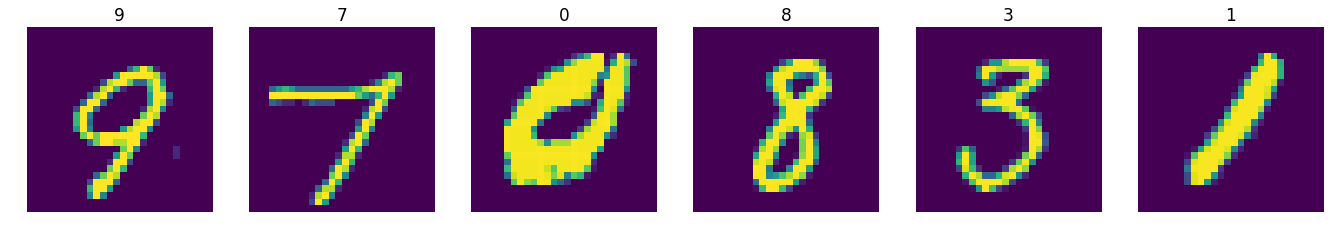

In [5]:
plt.figure(figsize = (10, 10))
figure, ax = plt.subplots(1, 6)
figure.subplots_adjust(0, 0, 3, 3) 

for i in range(0, 6, 1): 
    rnd_number = np.random.randint(0, len(train_images)) 
    image = np.reshape(train_images[rnd_number, :], (28, 28))
    ax[i].imshow(image)
    ax[i].set_title(train_labels[rnd_number], fontsize=17) 
    ax[i].axis('off')

## PCA- giảm chiều dữ liệu

In [6]:
# #import package
# import warnings
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Standardize features by removing the mean and scaling to unit variance. Fit to data, then transform it.

In [7]:
X = StandardScaler().fit_transform(train_images)

### Reduce the data dimension: 2D

In [8]:
pca_2d = PCA(n_components = 2)
result_2d = pca_2d.fit_transform(X)
result_2d

array([[ 0.39109355,  5.271782  ],
       [-4.780215  ,  0.19618684],
       [ 3.641547  ,  8.248507  ],
       ...,
       [-3.2695289 ,  1.9677815 ],
       [-2.796803  , -2.7280192 ],
       [-1.0692385 ,  8.284695  ]], dtype=float32)

Visualize a scatter plot of train_images dataset in 2D

In [9]:
def plot_scatter_2d(X, y):
    fig = plt.subplots(figsize =(15, 8)) 
    classes = 10 
    for i in range (classes):
        rows = np.where(y == i)[0] 
        X_label = X[rows, :] 
        plt.scatter(X_label[:,0], X_label[:,1], label = i)
        plt.legend()
    plt.show()

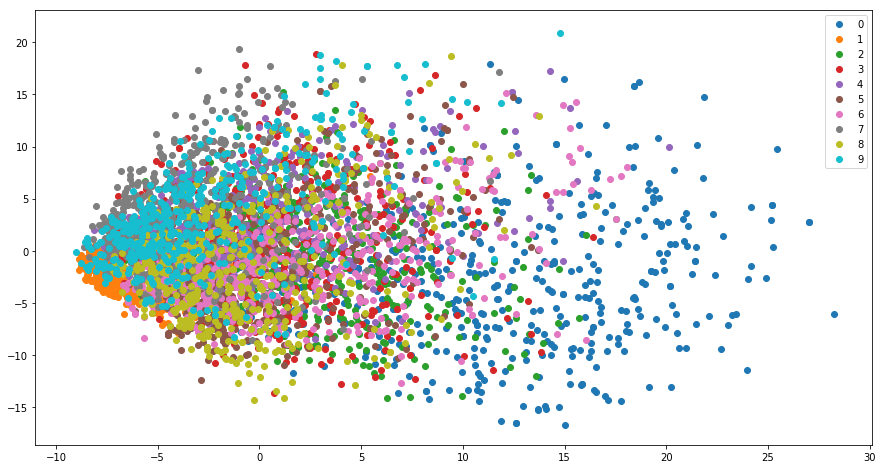

In [10]:
plot_scatter_2d(result_2d[0:5000], train_labels[0:5000])

### Reduce the data dimension: 3D

In [12]:
pca = PCA(n_components = 3)
result_3d = pca.fit_transform(train_images)
result_3d

array([[-153.0657  , -195.35995 , -338.7511  ],
       [-382.6671  ,  484.78848 , -519.78046 ],
       [  28.082647,  124.39662 , -146.21945 ],
       ...,
       [-141.1113  ,  124.62578 , -688.7119  ],
       [  22.654102,  269.08945 , -212.24681 ],
       [-461.89572 ,  137.22401 , -246.05405 ]], dtype=float32)

Visualize a scatter plot of train_images dataset in 3D

In [13]:
from mpl_toolkits.mplot3d import Axes3D #import 3d library

def plot_scatter_3d(X, y):
    fig = plt.figure(figsize = (15, 8)) 
    ax = fig.add_subplot(111, projection = '3d') 
    classes = 10 
    for i in range (classes):
        rows = np.where(y == i)[0] 
        X_label = X[rows, :] 
        ax.scatter(X_label[:,0], X_label[:,1],X_label[:,2], label = i) 
        ax.legend()
    plt.show()

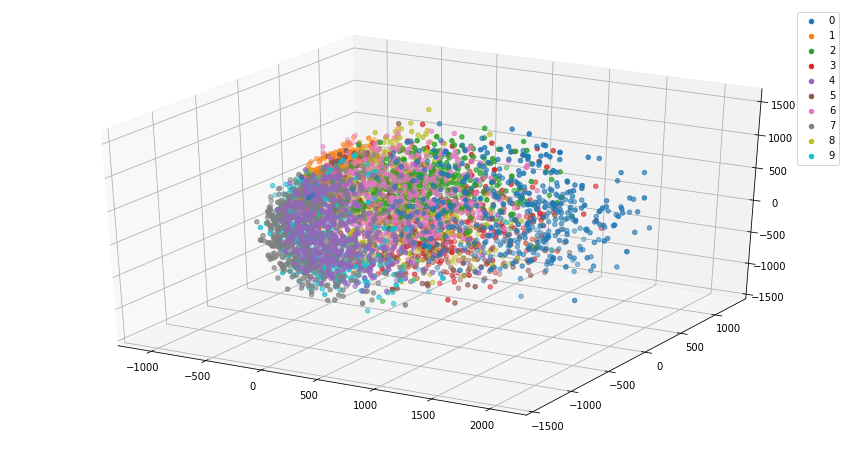

In [14]:
plot_scatter_3d(result_3d[0:5000], train_labels[0:5000])

## Multi-class support vector machine

Training and Fitting the model

In [15]:
from sklearn.svm import SVC
model = SVC() #build the model support vector machine

In [16]:
model.fit(train_images, train_labels) #fit the model with train_images and train_labels 

SVC()

Predictions from the trained model

In [17]:
labels_pred = model.predict(test_images) 

Model Evaluation

In [19]:
from sklearn.metrics import confusion_matrix
#confusion matrix

cf_matrix = confusion_matrix(test_labels,labels_pred)
print(cf_matrix)

[[ 929    0    1    0    0    3    4    0    3    0]
 [   0 1168    2    0    0    0    1    0    4    0]
 [   3    0  992    0    1    0    2    5    3    0]
 [   0    0    3  918    0    4    0    1    3    5]
 [   3    0    2    0 1007    0    3    0    2   14]
 [   6    0    0    3    0  897    6    2    8    3]
 [   5    0    0    0    0    2  950    0    5    0]
 [   1   10   10    3    3    0    0 1008    0    8]
 [   6    0    1    2    9    3    0    4  933    4]
 [   6    2    0    9   15    2    1    4    1  982]]


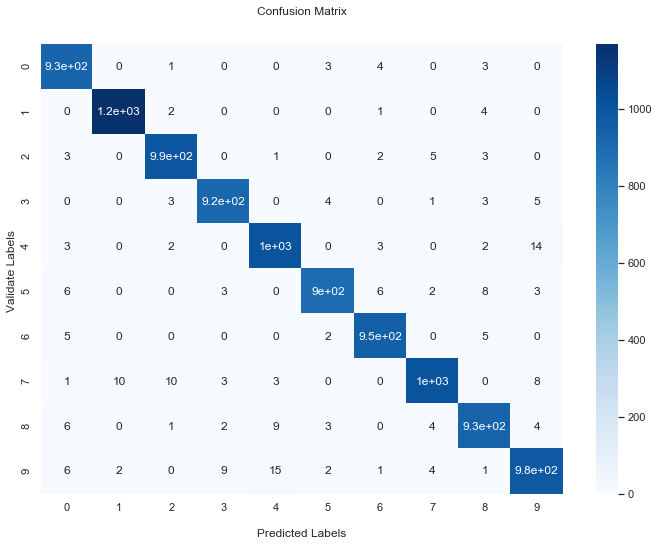

In [54]:
#visualize the confusion matrix 
import seaborn as sns

sns.set(rc = {'figure.figsize': (11.7, 8.27)}) 
ax = sns.heatmap(cf_matrix, annot = True, cmap = 'Blues') 

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Labels')
ax.set_ylabel('Validate Labels ');

plt.show()

In [57]:
from sklearn.metrics import accuracy_score
#accuracy
print('accuracy = ',accuracy_score(test_labels, labels_pred))

accuracy =  0.9784


In [58]:
from sklearn.metrics import precision_score
#precision
precision = precision_score(test_labels, labels_pred, average = 'macro')
print('Precision: %f' % precision)

Precision: 0.978234


In [59]:
from sklearn.metrics import recall_score
#recall
recall = recall_score(test_labels, labels_pred, average = 'macro')
print('Recall: %f' % recall)

Recall: 0.978243
